### Análise exploratória de dados (EDA) de reservas em hotéis

Projeto para analisar os dados de um _dataset_ de reservas de dois hotéis diferentes, um denominado hotel urbano, por se localizar dentro de uma cidade, e outro do tipo resort, localizado em uma praia. A intenção **principal** desta análise é ganhar conhecimento sobre o que acontece com os hóspedes, reservas e etc dos hotéis, assumindo que **nada** é conhecido. Assume-se, então, um cenário onde a organização está iniciando sua jornada com dados e que nunca foi traçado um perfil de cliente, sazonalidade de demanda e etc (ou pelo menos é possível confirmar entendimentos prévios). Além disso, o projeto mostra como é possível trazer conhecimentos/valores importantes para a empresa por meio de uma EDA.

Este projeto é baseado no dataset disponível no [Kaggle](https://www.kaggle.com/datasets/jessemostipak/hotel-booking-demand) e foi extraído do artigo ["Hotel booking demand datasets"](https://www.sciencedirect.com/science/article/pii/S2352340918315191) escrito por Nuno Antonio, Ana Almeida, e Luis Nunes para Data in Brief, Volume 22, Fevereiro 2019. Por fim, ressalta-se que o dataset já havia sido previamente limpo por Thomas Mock e Antoine Bichat.

<br>

- Principais técnicas aplicadas
    - Descobrir o significado das variáveis;
    - Limpeza e tratamento dos dados (sugestões e hipóteses apresentadas)
    - Visualização dos dados;
    - Identificação de valores nas informações


Ao final de cada análise, é sugerido como aquela informação pode trazer valor à organização, que é o objetivo final de qualquer análise de dados.

O primeiro passo de qualquer análise de dados é entender o significado de cada _feature_, o que provavelmente requer a atuação em conjunta com alguém de negócios. Além disso, as vezes se faz necessário entender como os dados foram obtidos junto com algum engenheiro(a) de dados. Abaixo, apresenta-se as 32 variáveis do dataset a fim de esclarecimento ao leitor.

*  **hotel** = Resort Hotel or City Hotel
*  **is_canceled**	= Value indicating if the booking was canceled (1) or not (0)
*  **lead_time** = Number of days that elapsed between the entering date of the booking into the PMS and the arrival date
*  **arrival_date_year** = Year of arrival date
*  **arrival_date_month** = Month of arrival date
*  **arrival_date_week_number** = Week number of year for arrival date
*  **arrival_date_day_of_month** = Day of arrival date
*  **stays_in_weekend_nights** = Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
*  **stays_in_week_nights** = Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
*  **adults** = Number of adults
*  **children** = Number of children
*  **babies** = Number of babies
*  **meal** = Type of meal booked. Categories are presented in standard hospitality meal packages: Undefined/SC – no meal package; BB – Bed & Breakfast; HB – Half board (breakfast and one other meal – usually dinner); FB – Full board (breakfast, lunch and dinner)
*  **country**	= Country of origin. Categories are represented in the ISO 3155–3:2013 format
*  **market_segment** = Market segment designation. In categories, the term “TA” means “Travel Agents” and “TO” means “Tour Operators”
*  **distribution_channel** = Booking distribution channel. The term “TA” means “Travel Agents” and “TO” means “Tour Operators”
*  **is_repeated_guest** = Value indicating if the booking name was from a repeated guest (1) or not (0)
*  **previous_cancellations** = Number of previous bookings that were cancelled by the customer prior to the current booking
*  **previous_bookings_not_canceled** = Number of previous bookings not cancelled by the customer prior to the current booking
*  **reserved_room_type** = Code of room type reserved. Code is presented instead of designation for anonymity reasons.
*  **assigned_room_type** = Code for the type of room assigned to the booking. Sometimes the assigned room type differs from the reserved room type due to hotel operation reasons (e.g. overbooking) or by customer request. Code is presented instead of designation for anonymity reasons.
*  **booking_changes** = Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation
*  **deposit_type** = Indication on if the customer made a deposit to guarantee the booking. This variable can assume three categories: No Deposit – no deposit was made; Non Refund – a deposit was made in the value of the total stay cost; Refundable – a deposit was made with a value under the total cost of stay.
*  **agent** = ID of the travel agency that made the booking
*  **company** = ID of the company/entity that made the booking or responsible for paying the booking. ID is presented instead of designation for anonymity reasons
*  **days_in_waiting_list** = Number of days the booking was in the waiting list before it was confirmed to the customer
*  **customer_type** = Type of booking, assuming one of four categories: Contract - when the booking has an allotment or other type of contract associated to it; Group – when the booking is associated to a group; Transient – when the booking is not part of a group or contract, and is not associated to other transient booking; Transient-party – when the booking is transient, but is associated to at least other transient booking
*  **adr** = Average Daily Rate as defined by dividing the sum of all lodging transactions by the total number of staying nights
*  **required_car_parking_spaces** = Number of car parking spaces required by the customer
*  **total_of_special_requests** = Number of special requests made by the customer (e.g. twin bed or high floor)
*  **reservation_status** = Reservation last status, assuming one of three categories:	BO; Canceled – booking was canceled by the customer; Check-Out – customer has checked in but already departed; No-Show – customer did not check-in and did inform the hotel of the reason why
*  **reservation_status_date** = Date at which the last status was set. This variable can be used in conjunction with the ReservationStatus to understand when was the booking canceled or when did the customer checked-out of the hotel

Como é feito uma análise geral dos dados e não é tentado criar algum modelo de predição ou clusterização, nenhuma variável foi previamente selecionado/descartada.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
df_booking = pd.read_csv('hotel_bookings.csv', parse_dates=['reservation_status_date'])
df_booking.head()
# A coluna 'reservation_status_date' já foi alterada para o formato de data, pois haviado sido
# verificado previamente que ela estava salva como object

hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  deposit_type  \
0                        0                     0       2  ...    No Deposit   
1                        0                     0       2  ...    No Deposit   
2                        0                     1       1  ...    No Deposit   
3                        0                     1       1  ...    No Deposit   
4                        0                     2       2  ...    No Deposit   

   agent company days_in_waiting_list customer_type   adr  \
0    NaN     NaN                    0     Transient   0.0   
1    NaN     NaN                    0     Transient   0.0   
2    NaN     NaN                    0     Transient  75.0   
3  304.0     NaN                    0     Transient  75.0   
4  240.0     NaN                    0     Transient  98.0   

   required_car_parking_spaces  total_of_special_requests  reservation_status  \
0                            0                          0           Check-Out   
1                            0                          0           Check-Out   
2                            0                          0           Check-Out   
3                            0                          0           Check-Out   
4                            0                          1           Check-Out   

  reservation_status_date  
0              2015-07-01  
1              2015-07-01  
2              2015-07-02  
3              2015-07-02  
4              2015-07-03  

[5 rows x 32 columns]

In [3]:
# Informações gerais sobre as colunas do DataFrame
df_booking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119390 non-null  object        
 1   is_canceled                     119390 non-null  int64         
 2   lead_time                       119390 non-null  int64         
 3   arrival_date_year               119390 non-null  int64         
 4   arrival_date_month              119390 non-null  object        
 5   arrival_date_week_number        119390 non-null  int64         
 6   arrival_date_day_of_month       119390 non-null  int64         
 7   stays_in_weekend_nights         119390 non-null  int64         
 8   stays_in_week_nights            119390 non-null  int64         
 9   adults                          119390 non-null  int64         
 10  children                        119386 non-null  float64

Um ponto importante é sempre verificar se existem dados faltantes no dataset para depois planejar como os mesmos serão tratados

In [4]:
# Verificação de quais colunas possuem dados nulos
df_booking.isna().sum()[df_booking.isna().sum() > 0]

children         4
country        488
agent        16340
company     112593
dtype: int64

In [5]:
df_booking['children'].value_counts()

0.0     110796
1.0       4861
2.0       3652
3.0         76
10.0         1
Name: children, dtype: int64

Vê-se aqui que existem muitas entradas (94%) de "Company" que estão faltando. Além disso, a informação de agência de viagem não é tão interessante a primeira vista, a menos que isso fosse de interesse para estreitar relações comerciais. Dessa forma, tanto a coluna de empresa e agência serão deletadas. Ressalta-se que elas estão sendo deletadas, principalmente, por terem muitos dados faltantes.\
Para a coluna de crianças, os quatro casos faltantes serão alterados para zero porque não causarão danos significativos aos dados e também porque o dado faltante pode significar que a pessoa não tem filhos. Ressalta-se aqui que, possivelmente, o valor de filhos poderia ser estimado por meio de uma regressão. Por fim, todos os valores faltantes de "country" serão substituídos por "Outro" para indicar que a pessoa não quis identificar o país de origem.

In [6]:
df_booking = df_booking.drop(['agent', 'company'], axis=1)
df_booking['children'].fillna(0, inplace=True)
df_booking.country = df_booking['country'].fillna('Other')

# Verificação
df_booking.isna().sum()[df_booking.isna().sum() > 0]

Series([], dtype: int64)

In [7]:
# Análise dos dados numéricos do DataFrame
df_booking.describe()

is_canceled      lead_time  arrival_date_year  \
count  119390.000000  119390.000000      119390.000000   
mean        0.370416     104.011416        2016.156554   
std         0.482918     106.863097           0.707476   
min         0.000000       0.000000        2015.000000   
25%         0.000000      18.000000        2016.000000   
50%         0.000000      69.000000        2016.000000   
75%         1.000000     160.000000        2017.000000   
max         1.000000     737.000000        2017.000000   

       arrival_date_week_number  arrival_date_day_of_month  \
count             119390.000000              119390.000000   
mean                  27.165173                  15.798241   
std                   13.605138                   8.780829   
min                    1.000000                   1.000000   
25%                   16.000000                   8.000000   
50%                   28.000000                  16.000000   
75%                   38.000000                  23.000000   
max                   53.000000                  31.000000   

       stays_in_weekend_nights  stays_in_week_nights         adults  \
count            119390.000000         119390.000000  119390.000000   
mean                  0.927599              2.500302       1.856403   
std                   0.998613              1.908286       0.579261   
min                   0.000000              0.000000       0.000000   
25%                   0.000000              1.000000       2.000000   
50%                   1.000000              2.000000       2.000000   
75%                   2.000000              3.000000       2.000000   
max                  19.000000             50.000000      55.000000   

            children         babies  is_repeated_guest  \
count  119390.000000  119390.000000      119390.000000   
mean        0.103886       0.007949           0.031912   
std         0.398555       0.097436           0.175767   
min         0.000000       0.000000           0.000000   
25%         0.000000       0.000000           0.000000   
50%         0.000000       0.000000           0.000000   
75%         0.000000       0.000000           0.000000   
max        10.000000      10.000000           1.000000   

       previous_cancellations  previous_bookings_not_canceled  \
count           119390.000000                   119390.000000   
mean                 0.087118                        0.137097   
std                  0.844336                        1.497437   
min                  0.000000                        0.000000   
25%                  0.000000                        0.000000   
50%                  0.000000                        0.000000   
75%                  0.000000                        0.000000   
max                 26.000000                       72.000000   

       booking_changes  days_in_waiting_list            adr  \
count    119390.000000         119390.000000  119390.000000   
mean          0.221124              2.321149     101.831122   
std           0.652306             17.594721      50.535790   
min           0.000000              0.000000      -6.380000   
25%           0.000000              0.000000      69.290000   
50%           0.000000              0.000000      94.575000   
75%           0.000000              0.000000     126.000000   
max          21.000000            391.000000    5400.000000   

       required_car_parking_spaces  total_of_special_requests  
count                119390.000000              119390.000000  
mean                      0.062518                   0.571363  
std                       0.245291                   0.792798  
min                       0.000000                   0.000000  
25%                       0.000000                   0.000000  
50%                       0.000000                   0.000000  
75%                       0.000000                   1.000000  
max                       8.000000                   5.000000

In [8]:
df_booking[df_booking['lead_time'] > 365][['booking_changes']].value_counts().sort_values()
df_booking['adults'].value_counts()
df_booking['children'].value_counts()
df_booking['babies'].value_counts()
df_booking['days_in_waiting_list'].value_counts().sort_index()
df_booking['required_car_parking_spaces'].value_counts()

0    111974
1      7383
2        28
3         3
8         2
Name: required_car_parking_spaces, dtype: int64

A partir do resumo das variáveis numéricas do dataset acima, é possível analisar cada variável para identificar se há dados discrepantes, que possivelmente tenham alg errado com eles.

No caso da coluna "lead_time", poderíamos achar estranho que há reservas feitas com mais de 6 ou 12 meses de antecedência, mas há casos que as reservas foram alteradas (veja "booking_changes"), possivelmente sendo adiadas, fazendo com que o lead_time aumentasse. No entanto, ainda sim restam muitas reservas com alto valor de lead_time e sem alteração na reserva. Isso resultado na seguinte situação: ou essa coluna não deve ser analisada ou deve-se tratar esses valores discrepantes. Uma saída simples seria simplesmente deletar essas observações quando a análise envolver o "lead_time".

Parace haver estadias com muitos adultos, mas devemos recordar que há reservas de agências de viagem, logo a reserva pode considerar esses casos. Já para crianças, há uma apenas uma observação com dados estranhos, que seria a com 10 crianças e 2 adultos. Para saber o que fazer com essa observação, podemos visualizar um box plot para entender melhor a distribuição. Por fim, no de bebês, já é muito improvável que um ou dois adultos tenham 9 e 10 bebês. Logo faria sentido em deletar essas observações.

As colunas "previous_cancellations, previous_bookings_not_canceled, booking_changes, days_in_waiting_list" possuem dados com valores muito superiores acima do "esperado", o que chama atenção, por exemplo haver mitas pessoas que cancelaram sua reserva previamente 25 e 26 reservas ou que já se hospedaram cerca de 70 vezes no mesmo local. Isso parece ser erro de preenchimento ou erro na hora de transformar ou salvar os dados, coisa que seria interessante alinhar com algum engenheiro(a) de dados para melhorar a qualidade dos dados. No entanto, sempre devemos considerar a questão da reserva por agência de viagens e empresas.

### Visualização de dados

Nas partes acima, foi possível analisar feature por feature, observando que havia dados faltantes e outros discrepantes. Ainda, identificamos que alguns dados discrepantes não fazem sentido e uma saída direta é apenas deletá-los (seja para a análise respectiva a ele ou do dataset inteiro), e identificamos também outras que precisariam ser melhor investigadas, seja com a equipe de negócio, de engenharia de dados ou com outras técnicas, como identificação de outliers. No entanto, nenhuma dessas possibilidades foi realizada aqui para não extender muito esse arquivo, mas deve-se ter isso mente quando interpretarmos alguns dos gráficos a seguir.

Para ajudar na interpretação e leitura dos dados, elaborei algumas perguntas de negócios que poderiam ser feitas com o conjunto de dados (outras também poderia ter sido elaboradas!).

### 1. Qual são os meses com mais ocupação? Em que países se situam os hotéis?


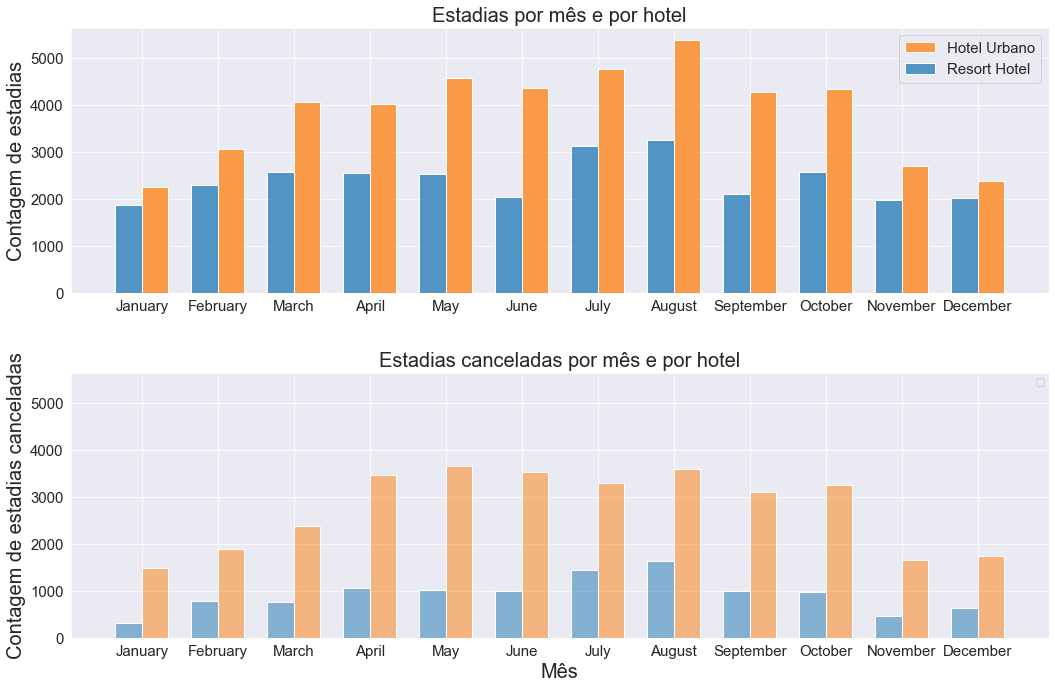

In [20]:
df_booking['arrival_date_month'] = pd.Categorical(df_booking['arrival_date_month'], ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], ordered=True)
fig, ax = plt.subplots(2, 1, figsize=(15,10), sharey=True)

sns.histplot(data=df_booking[df_booking['is_canceled']==0], x='arrival_date_month', discrete=True, hue='hotel', multiple='dodge', shrink=0.7, ax=ax[0])
sns.histplot(data=df_booking[df_booking['is_canceled']==1], x='arrival_date_month', discrete=True, hue='hotel', multiple='dodge', shrink=0.7, ax=ax[1], alpha=0.5)
ax[0].set_title('Estadias por mês e por hotel', fontsize=20)
ax[1].set_title('Estadias canceladas por mês e por hotel', fontsize=20)
fig.tight_layout(pad=3)
ax[0].set_xlabel(None)
ax[1].set_xlabel('Mês', fontsize=20)
ax[0].set_ylabel('Contagem de estadias', fontsize=20)
ax[1].set_ylabel('Contagem de estadias canceladas', fontsize=20)
ax[0].legend(title=None, labels=['Hotel Urbano', 'Resort Hotel'], fontsize=15)
ax[1].legend(labels=[])
ax[0].tick_params(axis='x', labelsize=15)
ax[0].tick_params(axis='y', labelsize=15)
ax[1].tick_params(axis='x', labelsize=15)
ax[1].tick_params(axis='y', labelsize=15);

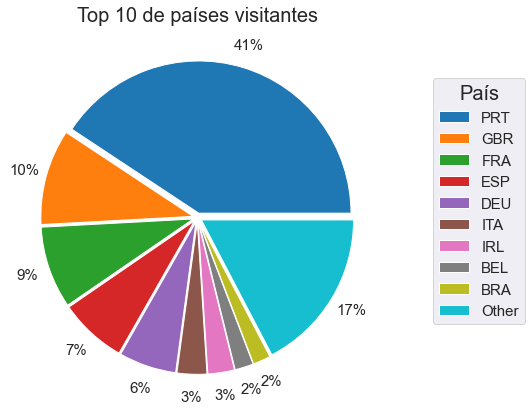

In [31]:
top_9_country = list(df_booking['country'].value_counts().index[:9])
df_booking['country_2'] = df_booking['country'].apply(lambda x: x if x in top_9_country else 'Other')
ax = df_booking['country_2'].value_counts().reindex(['PRT', 'GBR', 'FRA', 'ESP', 'DEU', 'ITA', 'IRL', 'BEL', 'BRA', 'Other']).plot(kind='pie', autopct='%1.0f%%', labeldistance=None, figsize=(10,7), fontsize=15, pctdistance=1.15, explode=np.repeat(0.03,10))
ax.set_ylabel('')
ax.legend(loc='lower left', bbox_to_anchor = (1.1,0.2), title='País', fontsize=15, title_fontsize=20)
ax.set_title('Top 10 de países visitantes', fontsize=20);

**Análise:** os meses com maior ocupação são de Maio a Setembro, o que leva a crer que esses são os meses de verão naquele país onde estão localizados o hotel. A grande maioria dos visitantes são de Portugal (41%) e outros países europeis, logo se supõe que os hotéis estão em Portugual.\
Essa hipótese é confirma lendo o artigo de referência: Resort Hotel está em Algarve e o Hotel urbano está em Lisboa.


<img src="pt-01.jpg" alt="Drawing" style="width: 500px;"/>

### 2. Os meses mais ocupados são os meses mais rentáveis?

In [32]:
df_booking_prices = df_booking.pivot_table(index='hotel', columns='arrival_date_month', values='adr', aggfunc='mean').T
fig = px.line(data_frame=df_booking_prices)

fig.update_layout(
    xaxis_title = {
        'text':'Mês',
        'font_size': 20,
        'font_family':'Times New Roman'
    },
    yaxis_title = {
        'text':'Diária média',
        'font_size': 20,
        'font_family':'Times New Roman'
    },
    title = {
        'text':'Diária média por mês reservado',
        'font_size': 20,
        'font_family':'Times New Roman',
        'x':0.5,
        'y':0.95,
        'font_color':'black'
    },
    legend_title=None,
    template='plotly_white',
    xaxis={
        'tickangle':-45,
        'tickfont': {
            'size':15
        }
    },
    yaxis={
        'tickfont': {
            'size':15
        }
    }
)


**Análise:** Sim, no geral, os meses mais ocupados são aqueles com os maiores valores de diária. Assumindo que custos variáveis não aumentem na mesma proporção, tem-se que o meses mais movimentados serão com maiores receitas/lucros. Além disso, observamos que o verão é o único período que o resort hotel é mais rentável que o hotel urbano.


### 3. Existem mais problemas com reservas nos meses mais ocupados?

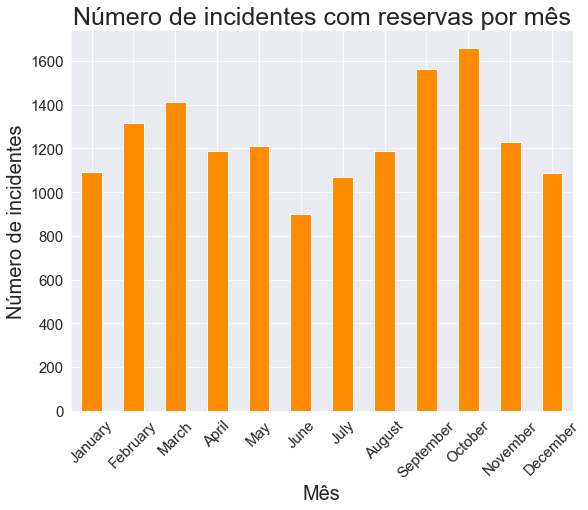

In [33]:
plt.figure(figsize=(9,7))
df_booking['reserved_room_is_assigned'] = df_booking['reserved_room_type'] == df_booking['assigned_room_type']
ax = df_booking.pivot_table(index='arrival_date_month', columns='reserved_room_is_assigned', aggfunc='count').adr.iloc[:, 0].plot(kind='bar', color='darkorange');

ax.set_title('Número de incidentes com reservas por mês', fontsize=25)
ax.set_xlabel('Mês', fontsize=20)
ax.set_ylabel('Número de incidentes', fontsize=20)
ax.set_xlabel('Mês', fontsize=20)
ax.tick_params(axis='x', labelsize=15, rotation=45)
ax.tick_params(axis='y', labelsize=15);

**Análise:** não há um correlação clara entre os meses mais ocupados e os meses que os hóspedes não ficaram com aquilo que reservaram (incidentes). Isso pode significar que os hotéis tem um KPI de eficiência de gestão adequada ao longo do ano. Ou seja, o número de colaboradores deve variar ao longo do ano de acordo com a demanda.

Os dois graficos acima podem, em conjunto, auxiliar na melhor gestão de atividades dos hotéis, pois identificam os períodos de maior e menor demanda, além de identificar falhas que ocorrem em razão do atual modo de se operar.

### 4. As pessoas reservam com mais antecêndia os meses que costumam ser mais ocupados?


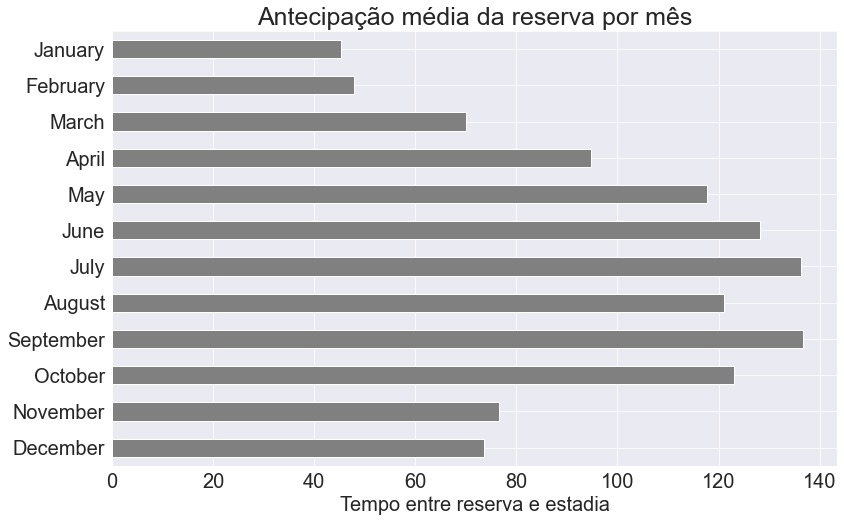

In [34]:
ax=df_booking.pivot_table(index='arrival_date_month', values='lead_time').plot(kind='barh', figsize=(13,8),xlabel='', legend=None, fontsize=20, color='grey')
ax.set_xlabel('Tempo entre reserva e estadia', fontsize=20)
ax.set_title('Antecipação média da reserva por mês', fontsize=25)
ax.invert_yaxis();

**Análise:** Sim, no geral, as pessoas reservam com mais antecedência se eles planejam viajar nos meses com maior demanda.

### 5. Qual hotel cada público prefere?

In [35]:
df_booking_only_adults = df_booking[(df_booking['babies']==0) & (df_booking['children']==0)].pivot_table(index='hotel', values='adults', aggfunc='count')
df_booking_has_children = df_booking[df_booking['children']>0].pivot_table(index='hotel', values='children', aggfunc='count')
df_booking_has_babies = df_booking[df_booking['babies']>0].pivot_table(index='hotel', values='babies', aggfunc='count')
df_booking_family_members = df_booking_only_adults.join(df_booking_has_children).join(df_booking_has_babies)
df_booking_family_members

adults  children  babies
hotel                                 
City Hotel     73927      5106     369
Resort Hotel   36131      3484     548

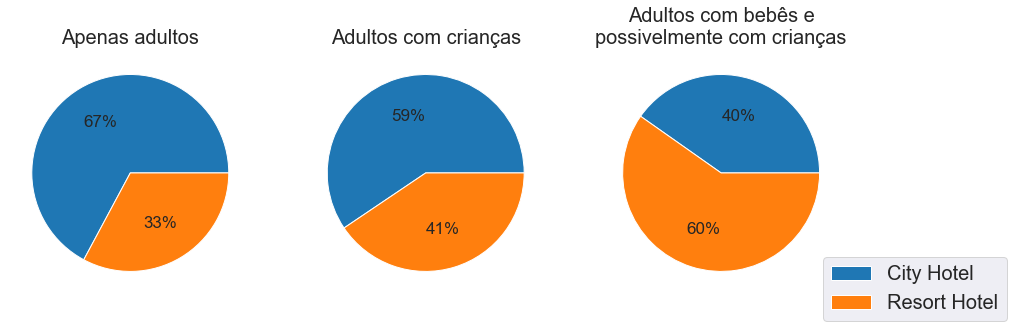

In [36]:
fig, ax = plt.subplots(1,3, figsize=(15,10))
ax[0].pie(data=df_booking_family_members, x='adults', autopct='%1.0f%%', textprops={'fontsize':17})
ax[0].set_title('Apenas adultos', fontsize=20)
ax[1].pie(data=df_booking_family_members, x='children', autopct='%1.0f%%', textprops={'fontsize':17})
ax[1].set_title('Adultos com crianças', fontsize=20)
ax[2].pie(data=df_booking_family_members, x='babies', autopct='%1.0f%%', textprops={'fontsize':17})
ax[2].set_title('Adultos com bebês e\npossivelmente com crianças', fontsize=20)
ax[2].legend(labels=df_booking_family_members.index, loc='upper right', bbox_to_anchor=(1.7,0.2), fontsize=20);

**Análise:** Quando adultos estão sozinhos ou posuem crianças, eles preferem ficar no hotel urbano. Famílias com bebês preferem o Resort. Isso pode ser assim porque bebês demandam maior cuidado, logo os pais procuram ambientes que ofereçam mais infraestrutura, sejam mais controlados. Logos eles preferem ficar em um tipo de hospedagem que eles vão passar o dia (todo) lá. Já para os outros casos, eles preferem sair e explorar novos lugares pois possuem mais independência. Essa informação é interessante para a organização para saber qual infraestrutura ela deve oferecer com maior qualidade para seus hóspedes.\
Outra análise que poderia ser feita é descobrir qual tipo de hotel é preferido por nacionalidade.


### 6. Os hotéis deveriam focar em um tipo específico de pacote de refeição?

*  **meal** = Type of meal booked. Categories are presented in standard hospitality meal packages: Undefined/SC – no meal package; BB – Bed & Breakfast; HB – Half board (breakfast and one other meal – usually dinner); FB – Full board (breakfast, lunch and dinner)

In [37]:
df_booking_meal = df_booking.pivot_table(index='meal', columns='hotel', aggfunc='count').adr.fillna(0)
df_booking_meal.loc['SC'] += df_booking_meal.loc['Undefined']
df_booking_meal.drop('Undefined', inplace=True)
df_booking_meal

hotel  City Hotel  Resort Hotel
meal                           
BB        62305.0       30005.0
FB           44.0         754.0
HB         6417.0        8046.0
SC        10564.0        1255.0

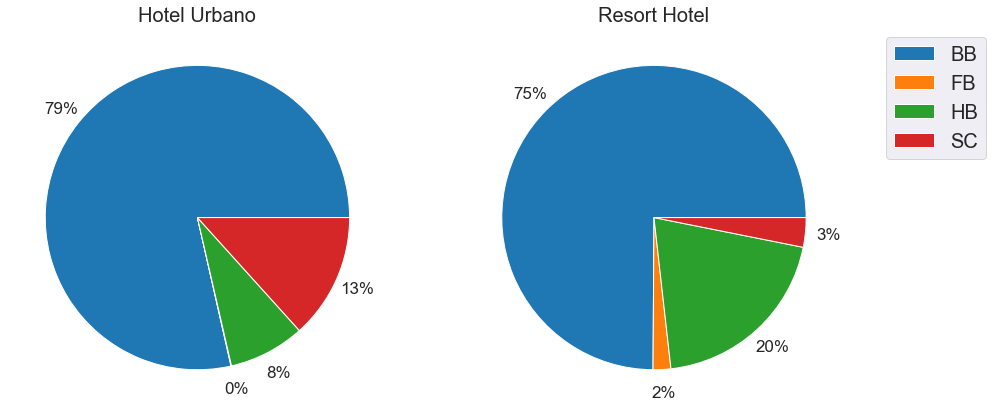

In [38]:
fig, ax = plt.subplots(1,2, figsize=(15,10))

ax[0].pie(data=df_booking_meal, x='City Hotel', autopct='%1.0f%%', textprops={'fontsize':17}, pctdistance=1.15)
ax[0].set_title('Hotel Urbano', fontsize=20)
ax[1].pie(data=df_booking_meal, x='Resort Hotel', autopct='%1.0f%%', textprops={'fontsize':17}, pctdistance=1.15)
ax[1].set_title('Resort Hotel', fontsize=20)
ax[1].legend(labels=df_booking_meal.index, fontsize=20, bbox_to_anchor=(1.4,1.0));

**Análise:** No hotel urbano, a maioria dos hópedes compra apenas café da manhã, seguido por aqueles que não compram nenhuma refeição. No resort, a maioria também compra apenas café da manhã, mas lá eles são seguidos por aqueles que compram o pacote de café + outra refeição, usualmente jantar. Isso pode significar que os hóspedes do Hotel Urbano comem mais fora do que aqueles hospedados no Resort, possivelmente porque os hóspedes do Resort ficam mais no hotel e o mesmo está localizado mais longe de restaurantes.

### 7. Existem outras correlações entre os dados numéricos do dataset?

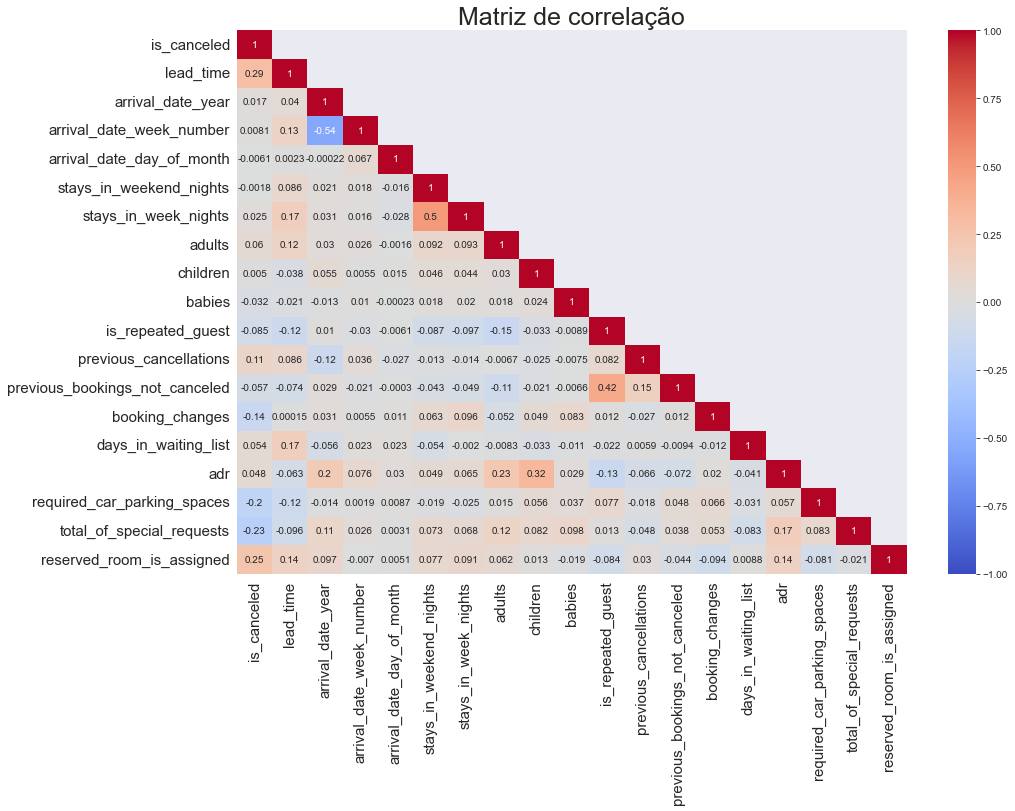

In [39]:
correlacoes = df_booking.corr()
plt.figure(figsize=(15,10))
sns.set_style('darkgrid')
mask = np.triu(np.ones_like(correlacoes, dtype=bool))
for i in range(len(mask)):
    for j in range(len(mask)):
        if i == j:
            mask[i][j] = False

ax = sns.heatmap(correlacoes, cmap='coolwarm', vmax=1, vmin=-1, annot=True, mask=mask)
ax.set_title('Matriz de correlação', fontsize = 25)
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15);

**Análise:** a maior correlação é 0,54 para "arrival_date_week_number" e "arrival_date_year", o que aparente ser uma correlação espúria. A segunda maior é "stays_in_week_nights" e "stays_in_weekend_nights" e é 0,50, vejamos o porquê a seguir.


### 8. As pessoas ficam continuam ficando no hotel se elas ficam durante a semana?

In [40]:
fig = px.scatter(data_frame=df_booking, x='stays_in_week_nights', y='stays_in_weekend_nights', color='hotel', marginal_x='box', marginal_y='box')

fig.update_layout(
    xaxis_title = {
        'text':'Diárias durante semana',
        'font_size': 20
    },
    yaxis_title = {
        'text':'Diárias durante o final de semana',
        'font_size': 20
    },
    title = {
        'text':'Diárias durante semana vs. Diárias durante o final de semana',
        'font_size': 20,
        'x':0.5,
        'y':0.95,
        'font_color':'black'
    },
    legend_title=None,
    showlegend=True,
    xaxis={
        'tickangle':-45,
        'tickfont': {
            'size':15
        }
    },
    yaxis={
        'tickfont': {
            'size':15
        }
    }
)

**Análise:** Sim, naturalmente, assim que a quantidade de diárias durante a semana é maior, os hóspedes costuam ficar de final de semana também. Essa informação pode ser interessante para fazer campanhas de marketing, oferecendo descontos para diárias de finais de semana para aumentar as vendas.